# I. Import libraries

In [512]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime, date
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.ticker as ticker
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, RobustScaler
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy import stats
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

# II. Dataset Overview

In [513]:
df = pd.read_csv('data_cleaned_Iowa_Liquor_Sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3885075 entries, 0 to 3885074
Data columns (total 25 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Invoice Number         object 
 1   Order Date             object 
 2   Store Number           int64  
 3   Store Name             object 
 4   Address                object 
 5   City                   object 
 6   Zip Code               float64
 7   County                 object 
 8   Category               int64  
 9   Category Name          object 
 10  Vendor Number          int64  
 11  Vendor Name            object 
 12  Item Number            int64  
 13  Product Name           object 
 14  Pack                   int64  
 15  Bottle Volume (ml)     int64  
 16  State Bottle Cost      float64
 17  State Bottle Retail    float64
 18  Bottles Sold           int64  
 19  Sale (Dollars)         float64
 20  Volume Sold (Liters)   float64
 21  Volume Sold (Gallons)  float64
 22  US Counties       

In [514]:
# Change type
df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Pack'] = df['Pack'].astype('object')

df['Zip Code'] = df['Zip Code'].astype(int)
df['Zip Code'] = df['Zip Code'].astype(object)

df['Bottle Volume (ml)'] = df['Bottle Volume (ml)'].astype('object')

df['Store Longitude'] = df['Store Longitude'].astype('object')
df['Store Latitude'] = df['Store Latitude'].astype('object')

df['US Counties'] = df['US Counties'].astype(int)
df['US Counties'] = df['US Counties'].astype(object)

In [515]:
# Check types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3885075 entries, 0 to 3885074
Data columns (total 25 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Invoice Number         object        
 1   Order Date             datetime64[ns]
 2   Store Number           int64         
 3   Store Name             object        
 4   Address                object        
 5   City                   object        
 6   Zip Code               object        
 7   County                 object        
 8   Category               int64         
 9   Category Name          object        
 10  Vendor Number          int64         
 11  Vendor Name            object        
 12  Item Number            int64         
 13  Product Name           object        
 14  Pack                   object        
 15  Bottle Volume (ml)     object        
 16  State Bottle Cost      float64       
 17  State Bottle Retail    float64       
 18  Bottles Sold          

In [516]:
df.shape

(3885075, 25)

In [517]:
df.head()

,Invoice Number,Order Date,Store Number,Store Name,Address,City,Zip Code,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Product Name,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),US Counties,Store Longitude,Store Latitude
0,INV-54554500001,2023-01-02,5245,BEST TRIP,"1516, SE 1ST ST",DES MOINES,50315,POLK,1022200,100% AGAVE TEQUILA,260,DIAGEO AMERICAS,89177,CASAMIGOS REPOSADO 750 (ml),6,750,29.99,44.99,3,134.97,2.25,0.59,1878,-93.61379,41.57608
1,INV-54554700023,2023-01-02,6303,WORLD LIQUOR & TOBACCO + VAPORS / DES MOINES,3200 SOUTHEAST 14TH STREET,DES MOINES,50320,POLK,1022100,MIXTO TEQUILA,395,PROXIMO,89193,JOSE CUERVO ESPECIAL REPOSADO 200 (ml),48,200,3.63,5.45,48,261.60,9.60,2.53,1878,-93.59738,41.55503
2,INV-54554700003,2023-01-02,6303,WORLD LIQUOR & TOBACCO + VAPORS / DES MOINES,3200 SOUTHEAST 14TH STREET,DES MOINES,50320,POLK,1012200,SCOTCH WHISKIES,260,DIAGEO AMERICAS,4626,BUCHANAN DELUXE 12YR 750 (ml),12,750,20.99,31.49,12,377.88,9.00,2.37,1878,-93.59738,41.55503
3,INV-54554100007,2023-01-02,2190,CENTRAL CITY 2 #1460,1460 2ND AVE,DES MOINES,50314,POLK,1032100,IMPORTED VODKAS,978,W J DEUTSCH & SONS LTD,34598,LUKSUSOWA VODKA 1750 (ml),6,1750,14.84,22.26,6,130.50,10.50,2.77,1878,-93.61979,41.60558
4,INV-54554300002,2023-01-02,2699,HY-VEE C-STORE #2 - ANKENY,1710 SW ORALABOR ROAD,ANKENY,50023,POLK,1031100,AMERICAN VODKAS,301,FIFTH GENERATION INC,38176,TITOS HANDMADE VODKA 750 (ml),12,750,10.00,15.00,24,360.00,18.00,4.75,1878,-93.62362,41.70324


In [518]:
df.tail()

,Invoice Number,Order Date,Store Number,Store Name,Address,City,Zip Code,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Product Name,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),US Counties,Store Longitude,Store Latitude
3885070,INV-71738100002,2024-06-30,4678,FAREWAY STORES #124 / ADEL,804 NILE KINNICK DR,ADEL,50003,DALLAS,1011200,STRAIGHT BOURBON WHISKIES,65,JIM BEAM BRANDS,19226,KNOB CREEK 750 (ml),6,750,21.00,31.50,6,189.0,4.50,1.18,1746,-94.0168,41.61021
3885071,INV-71739000010,2024-06-30,4136,FAREWAY STORES #983 / GRIMES,351 GATEWAY DR,GRIMES,50111,POLK,1031200,AMERICAN FLAVORED VODKA,380,PHILLIPS BEVERAGE,41692,UV BLUE RASPBERRY 1750 (ml),6,1750,11.50,17.25,6,103.5,10.50,2.77,1878,-93.77819,41.69155
3885072,INV-71736300006,2024-06-30,5698,CASEY'S #3746 / GRIMES,1650 NE BEAVER BROOKE BLVD,GRIMES,50111,POLK,1031100,AMERICAN VODKAS,301,FIFTH GENERATION INC,38176,TITOS HANDMADE VODKA 750 (ml),12,750,10.00,15.00,12,180.0,9.00,2.37,1878,-93.77709,41.6988
3885073,INV-71734800030,2024-06-30,4622,QUIK TRIP #544 / SE 14TH DM,3941 SE 14TH ST,DES MOINES,50320,POLK,1081600,WHISKEY LIQUEUR,421,SAZERAC COMPANY INC,64864,FIREBALL CINNAMON WHISKEY 375 (ml),24,375,5.33,8.00,9,72.0,3.37,0.89,1878,-93.59631,41.5487
3885074,INV-71736500028,2024-06-30,5409,CASEY'S GENERAL STORE # 2179/ WAUKEE,1995 SE UNIVERSITY,WAUKEE,50263,DALLAS,1022100,MIXTO TEQUILA,395,PROXIMO,87408,JOSE CUERVO ESPECIAL SILVER 750 (ml),12,750,12.00,18.00,3,54.0,2.25,0.59,1746,-93.83415,41.60043


In [519]:
# Create RFM color pallete
RFM_color = ['#ff7b7b', '#ff5252', '#ff0000', '#a70000']
sns.color_palette(RFM_color)

[(1.0, 0.4823529411764706, 0.4823529411764706),
 (1.0, 0.3215686274509804, 0.3215686274509804),
 (1.0, 0.0, 0.0),
 (0.6549019607843137, 0.0, 0.0)]

# III. Calculate RFM

# 1. Recency

In [520]:
# Assign the current date (the date of performing the task) 
current_date = date(2024,7,1)

# Group by Customers and check last date of purchase
recency = df.groupby(by = 'Store Number')['Order Date'].max().reset_index()

# Change the data type of 'Order Date' and then rename the column.
recency['Order Date'] = pd.DatetimeIndex(recency['Order Date']).date
recency = recency.rename(columns = {'Order Date' : 'Last Purchase Date'})

# Calculate recency
recency['Recency'] = recency['Last Purchase Date'].apply(lambda x: (current_date - x).days)
recency.drop('Last Purchase Date', axis = 1, inplace = True)

# Print dataframe
recency

,Store Number,Recency
0,2106,4
1,2130,4
2,2190,1
3,2191,5
4,2200,6
...,...,...
2153,10418,2
2154,10419,18
2155,10420,5
2156,10422,3


# 2. Frequency

In [521]:
# Group Customers by Invoice
frequency = df.groupby(by = 'Store Number')['Invoice Number'].count().reset_index()
frequency = frequency.rename(columns = {'Invoice Number' : 'Frequency'})
frequency


,Store Number,Frequency
0,2106,4868
1,2130,4907
2,2190,16398
3,2191,10071
4,2200,4951
...,...,...
2153,10418,50
2154,10419,4
2155,10420,129
2156,10422,30


# 3. Monetary

In [522]:
# Group Customers by Revenue
monetary = df.groupby('Store Number')['Sale (Dollars)'].sum().reset_index()
monetary = monetary.rename(columns = {'Sale (Dollars)' : 'Monetary'})
monetary

,Store Number,Monetary
0,2106,1265007.25
1,2130,2385691.63
2,2190,3184450.15
3,2191,2217721.30
4,2200,461698.06
...,...,...
2153,10418,5615.68
2154,10419,428.85
2155,10420,14042.67
2156,10422,5684.28


# 4. Create RFM Table

In [523]:
rfm = recency.merge(frequency, on = 'Store Number')
rfm = rfm.merge(monetary, on = 'Store Number')
rfm

,Store Number,Recency,Frequency,Monetary
0,2106,4,4868,1265007.25
1,2130,4,4907,2385691.63
2,2190,1,16398,3184450.15
3,2191,5,10071,2217721.30
4,2200,6,4951,461698.06
...,...,...,...,...
2153,10418,2,50,5615.68
2154,10419,18,4,428.85
2155,10420,5,129,14042.67
2156,10422,3,30,5684.28


# IV. RFM data preparation

# 1. RFM Summary

In [524]:
# Function for univariate analysis on continuous variables
def univariate_analysis_continuous_variable(df, column_name):
    desc = df[column_name].describe()
    print('Describe:')
    print(desc)
    print('Name:', df[column_name].name, ', dtype:', df[column_name].dtype)
    print('Mode:', df[column_name].mode()[0])
    print('Nunique:', df[column_name].nunique())
    print('Range:', desc['max'] - desc['min'])
    IQR = desc['75%'] - desc['25%']
    print('IQR:', IQR)
    print('Var:', df[column_name].var())
    print('Skew:', df[column_name].skew())
    print('Kurtosis:', df[column_name].kurtosis())

In [525]:
# Function to visualize and analyze a univariate continuous variable
def univariate_visualization_analysis_continuous_variable(df, column_name):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # KDE plot
    sns.kdeplot(df[column_name], ax=axes[0])
    axes[0].set_title(f'{column_name}')
    
    # Box plot
    sns.boxplot(x=df[column_name], ax=axes[1])
    axes[1].set_title(f'{column_name}')
    
    plt.tight_layout()
    plt.show()

In [526]:
def check_outlier(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    n_O_upper = sum(df[column_name] > upper_bound)
    n_L_upper = sum(df[column_name] < lower_bound)
    outliers_per = (n_O_upper + n_L_upper) / len(df) * 100
    
    return n_O_upper, n_L_upper, outliers_per

In [527]:
# Analyze skew
def analyze_skewness(df, col):
    skewness = stats.skew(df[col])
    print('Skewness of {col}: {skewness}')
    if skewness > 0:
        print('The distribution of {col} is right-skewed')
    elif skewness < 0:
        print('The distribution of {col} is left-skewed')
    else:
        print('The distribution of {col} is symmetric')

Feature: Recency
Skewness of {col}: {skewness}
The distribution of {col} is right-skewed


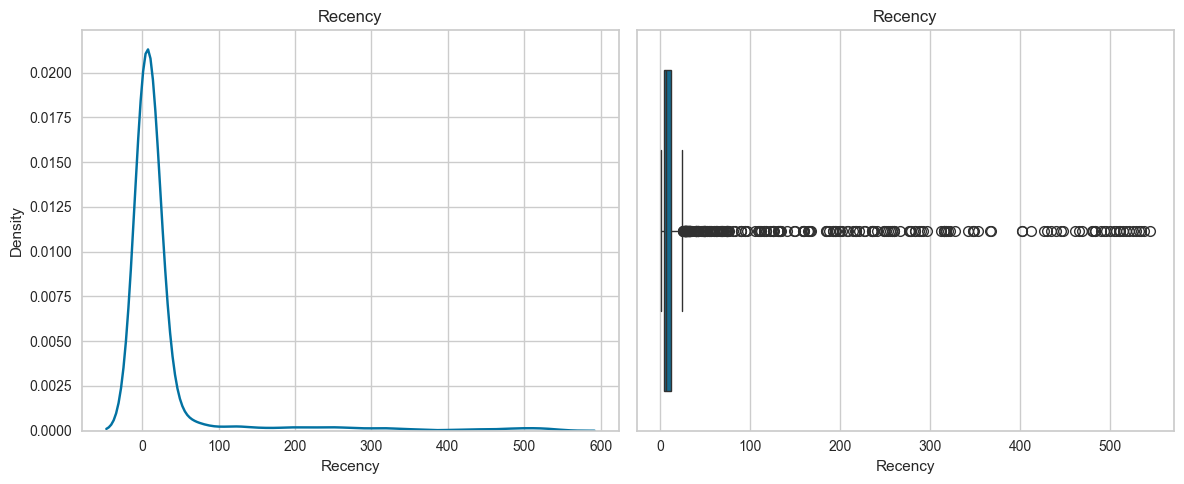

Describe:
count    2158.000000
mean       26.087581
std        74.176332
min         1.000000
25%         4.000000
50%         6.000000
75%        12.000000
max       544.000000
Name: Recency, dtype: float64
Name: Recency , dtype: int64
Mode: 6
Nunique: 170
Range: 543.0
IQR: 8.0
Var: 5502.128162806355
Skew: 4.78598182063204
Kurtosis: 24.104146426607485
Number of upper outliers: 269
Number of lower outliers: 0
Percentage of outliers: 12.5 %


************************************************************ 

Feature: Frequency
Skewness of {col}: {skewness}
The distribution of {col} is right-skewed


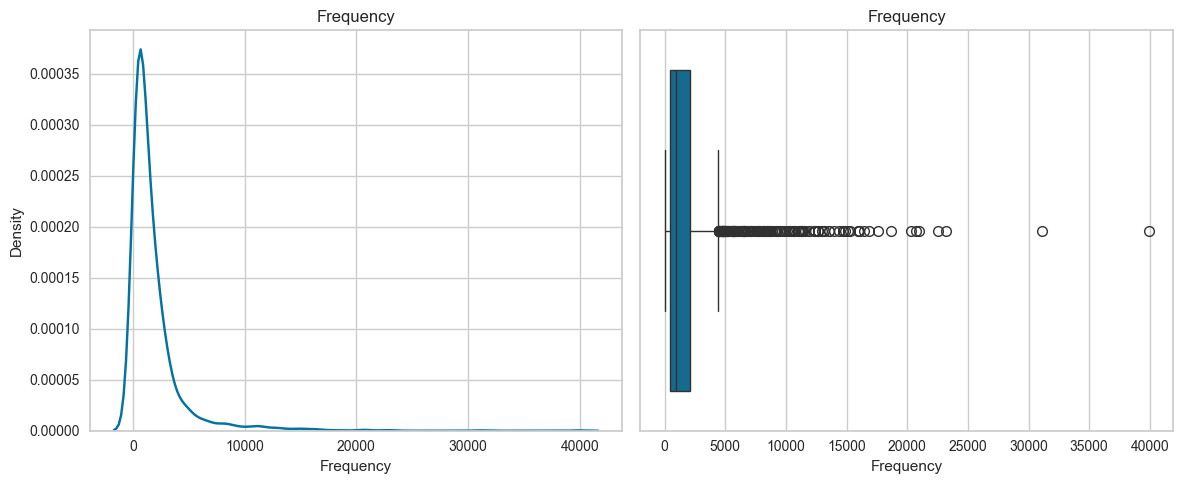

Describe:
count     2158.000000
mean      1800.312790
std       2664.611448
min          1.000000
25%        477.000000
50%        962.500000
75%       2070.750000
max      39936.000000
Name: Frequency, dtype: float64
Name: Frequency , dtype: int64
Mode: 233
Nunique: 1566
Range: 39935.0
IQR: 1593.75
Var: 7100154.168691241
Skew: 4.921674867269398
Kurtosis: 39.1384002426521
Number of upper outliers: 174
Number of lower outliers: 0
Percentage of outliers: 8.1 %


************************************************************ 

Feature: Monetary
Skewness of {col}: {skewness}
The distribution of {col} is right-skewed


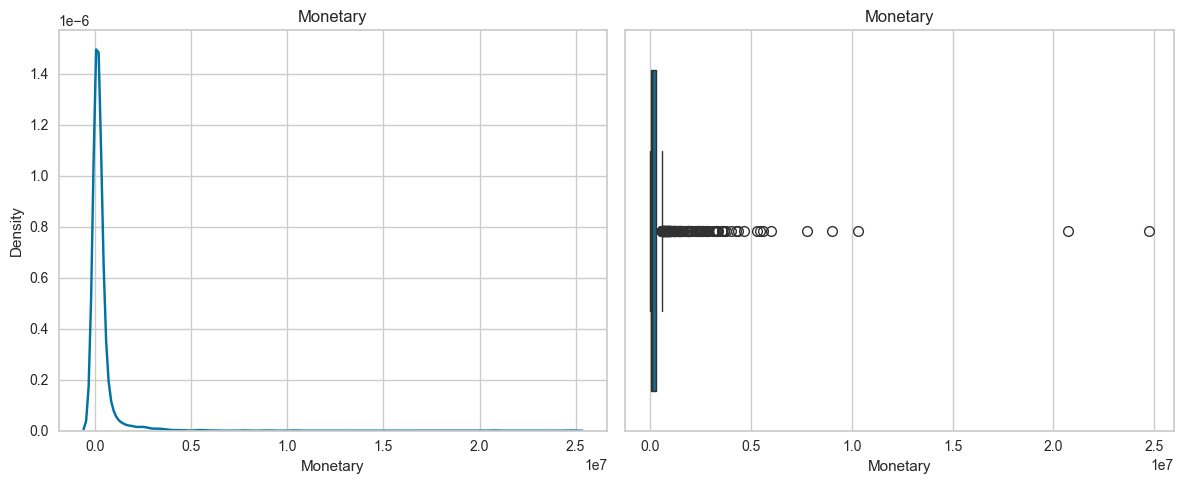

Describe:
count    2.158000e+03
mean     3.053046e+05
std      9.299038e+05
min      1.575000e+01
25%      5.725697e+04
50%      1.055085e+05
75%      2.632918e+05
max      2.474961e+07
Name: Monetary, dtype: float64
Name: Monetary , dtype: float64
Mode: 2296.32
Nunique: 2157
Range: 24749592.69
IQR: 206034.86750000002
Var: 864721047799.9425
Skew: 15.468666905106115
Kurtosis: 342.293016626227
Number of upper outliers: 211
Number of lower outliers: 0
Percentage of outliers: 9.8 %


************************************************************ 



In [528]:
for col in rfm.columns[1:]:
    print('Feature:', col)
    analyze_skewness(rfm, col)
    univariate_visualization_analysis_continuous_variable(rfm, col)
    univariate_analysis_continuous_variable(rfm, col)
    n_O_upper, n_L_upper, outliers_per = check_outlier(rfm, col)
    print(f'Number of upper outliers: {n_O_upper}')
    print(f'Number of lower outliers: {n_L_upper}')
    print(f'Percentage of outliers: {outliers_per:.1f} %')
    print('\n')
    print('*' * 60 ,'\n')

In [529]:
'''
Some problems:
- Recency distribution is right-skewed.
- Frequency distribution is right-skewed.
- Monetary distribution is right-skewed.
- There are relatively many outliers in all three variables above.
=> All three fields do not follow a normal distribution of data. It is necesssary to transformation data before using K-mean.

Some method for transformation
- log transformation.
- square root transformation.
- box-cox transformation.
- cube root tranformation.
'''

'\nSome problems:\n- Recency distribution is right-skewed.\n- Frequency distribution is right-skewed.\n- Monetary distribution is right-skewed.\n- There are relatively many outliers in all three variables above.\n=> All three fields do not follow a normal distribution of data. It is necesssary to transformation data before using K-mean.\n\nSome method for transformation\n- log transformation.\n- square root transformation.\n- box-cox transformation.\n- cube root tranformation.\n'

# 2. Feature Engineering

In [530]:
def analyze_skewness(x):
    fig, ax = plt.subplots(1,5, figsize=(10,5))
    sns.displot(rfm[x], ax=ax[0], color= "#ffbaba")
    sns.displot(np.log(rfm[x]), ax=ax[1], color= "#ff7b7b")
    sns.displot(np.sqrt(rfm[x]), ax=ax[2], color= "#ff5252")
    sns.displot(stats.boxcox(rfm[x])[0], ax=ax[3], color= "#ff0000")
    sns.displot(np.cbrt(rfm[x]), ax=ax[4], color= "#a70000") 
    plt.tight_layout()
    plt.show()
    #Print result 
    print("Original Skewness:", rfm[x].skew().round(2))
    print("Log-transformed Skewness:", np.log(rfm[x]).skew().round(2))
    print("Square Root-transformed Skewness:", np.sqrt(rfm[x]).skew().round(2))
    print("Box-Cox transformed Skewness:", pd.Series(stats.boxcox(rfm[x])[0]).skew().round(2))
    print("Cube Root-transformed Skewness:", pd.Series(np.cbrt(rfm[x])).skew().round(2))

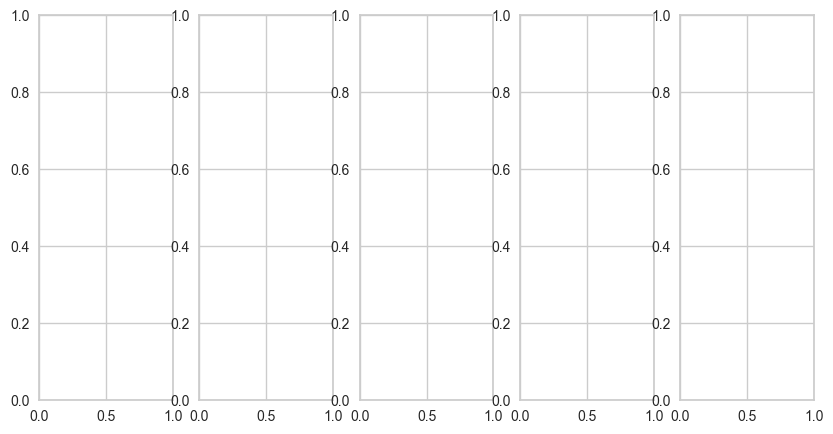

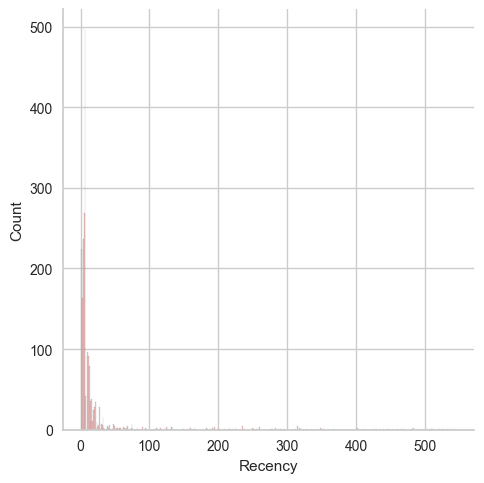

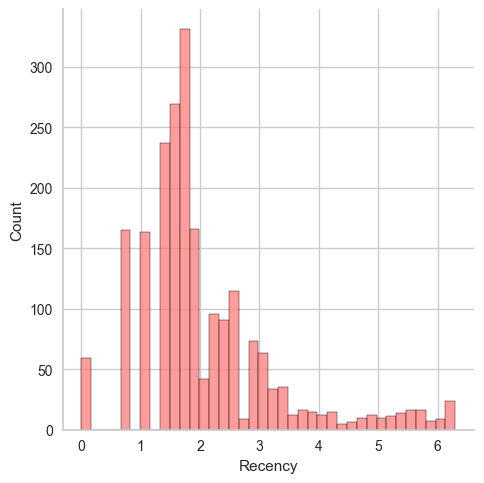

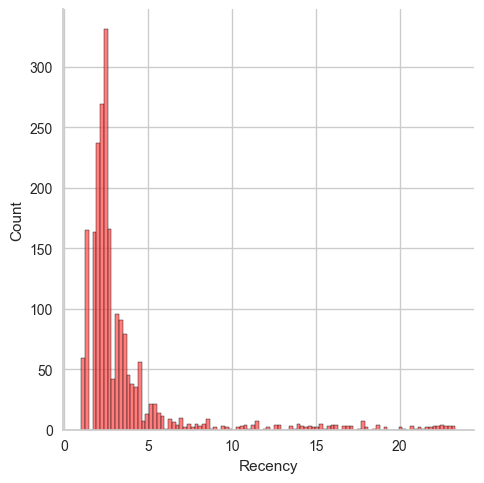

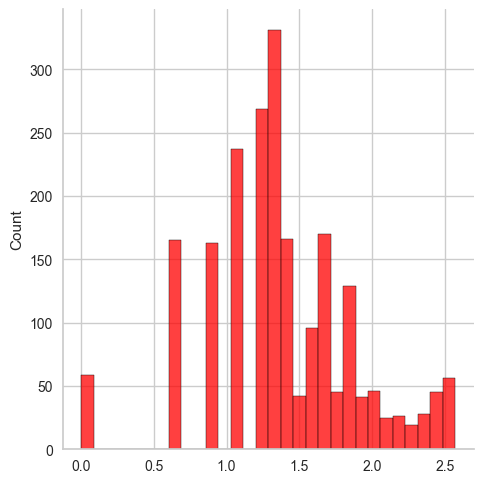

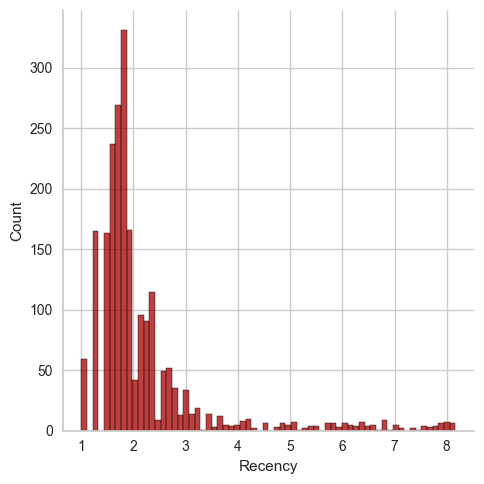

Original Skewness: 4.79
Log-transformed Skewness: 1.44
Square Root-transformed Skewness: 3.43
Box-Cox transformed Skewness: -0.03
Cube Root-transformed Skewness: 2.84


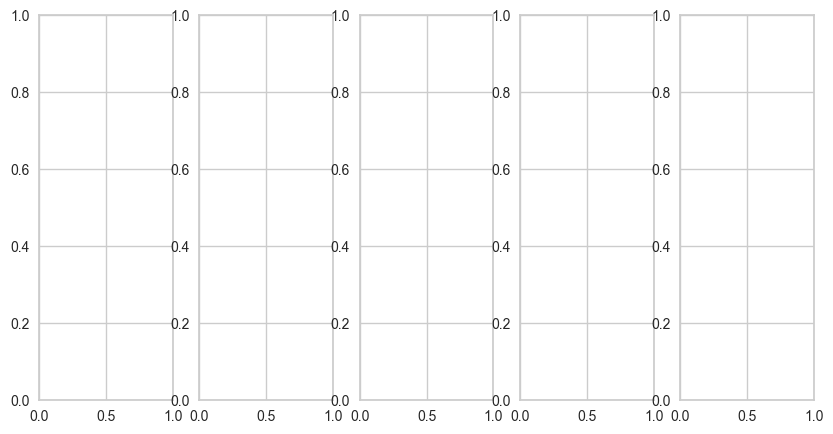

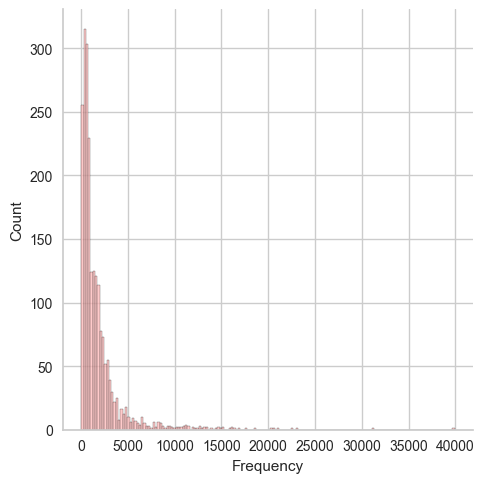

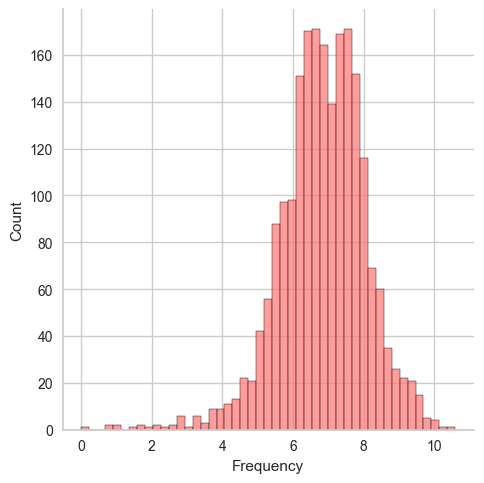

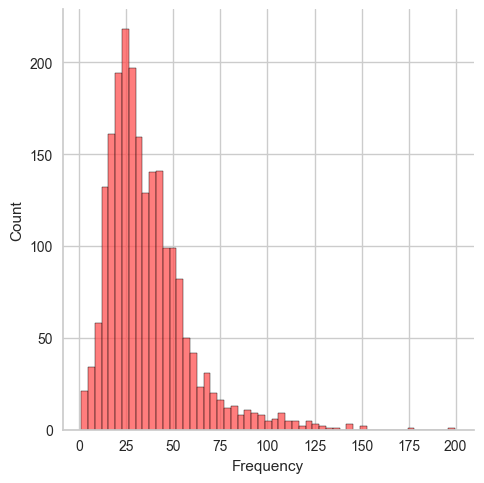

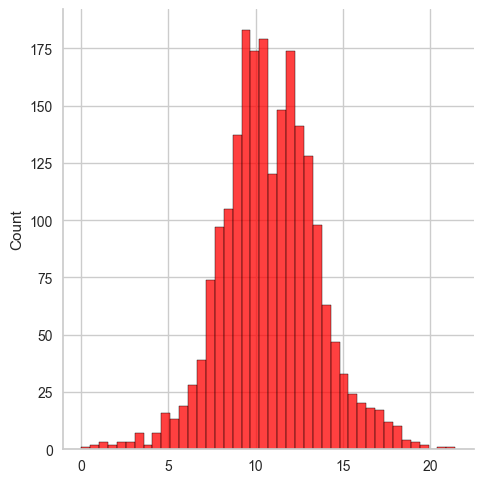

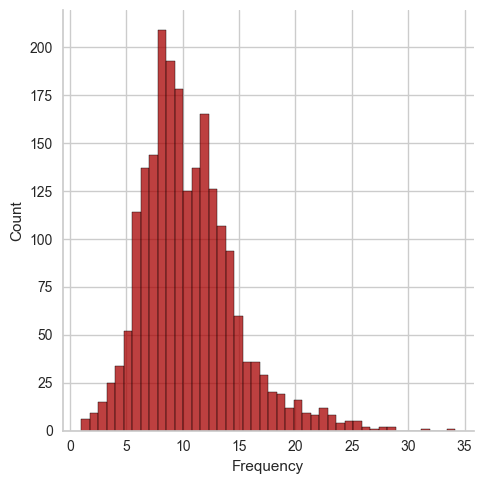

Original Skewness: 4.92
Log-transformed Skewness: -0.67
Square Root-transformed Skewness: 1.82
Box-Cox transformed Skewness: 0.04
Cube Root-transformed Skewness: 1.04


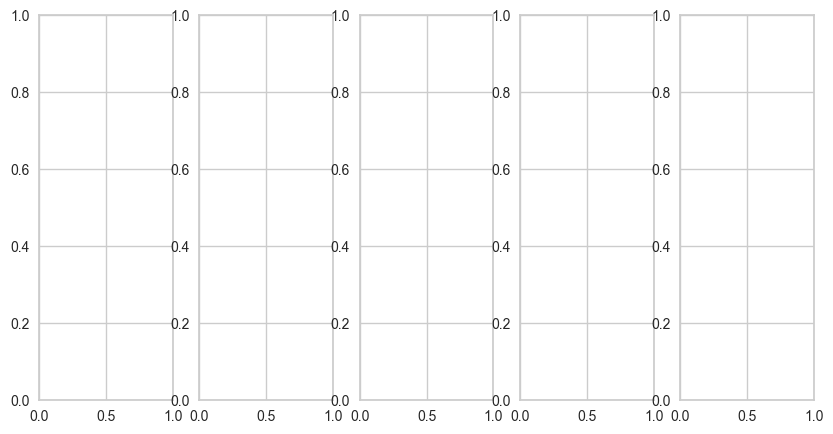

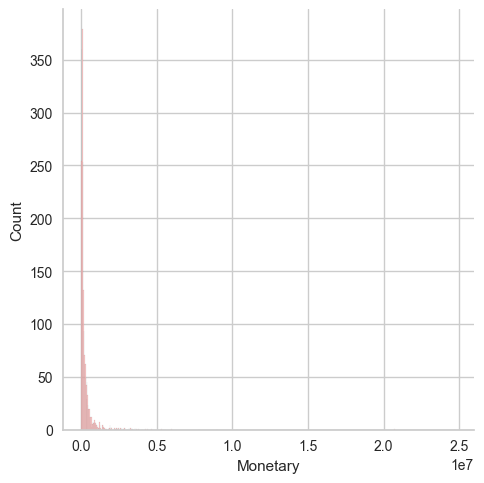

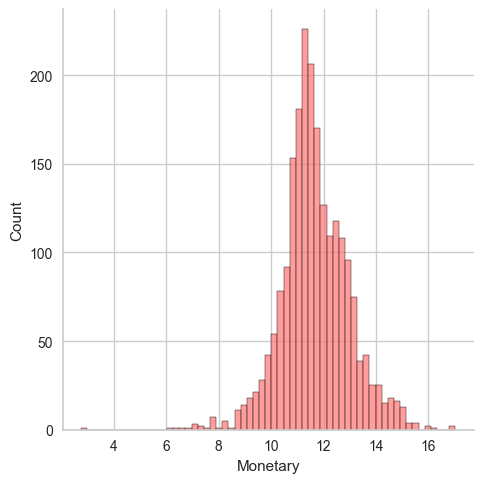

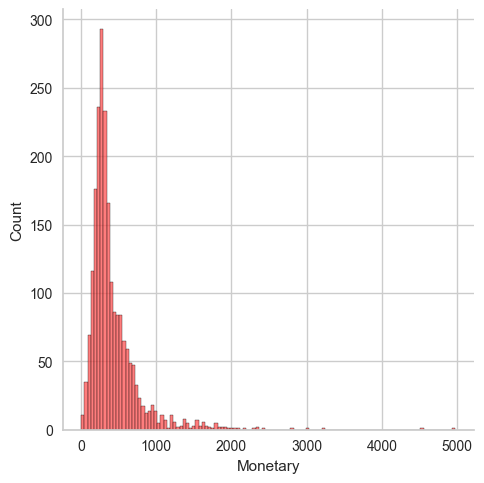

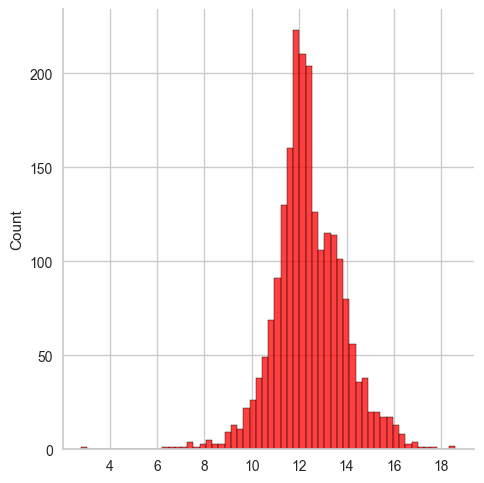

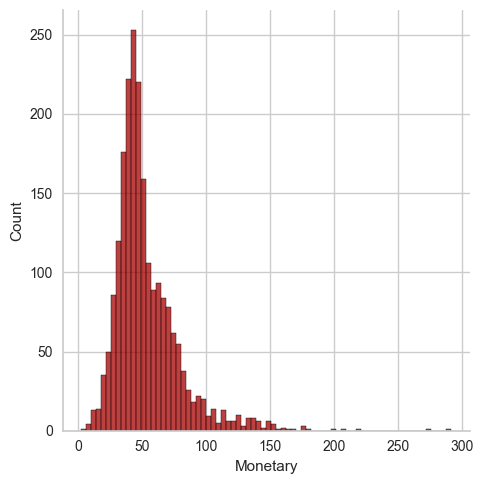

Original Skewness: 15.47
Log-transformed Skewness: -0.07
Square Root-transformed Skewness: 3.99
Box-Cox transformed Skewness: 0.01
Cube Root-transformed Skewness: 2.25


In [531]:
for col in rfm.columns[1:]:
    analyze_skewness(col)

In [532]:
# All data fields are well-suited for Box-Cox transformation as the Box-Cox values are closest to zero.

# 3. Create a new RFM df with boxcox

In [533]:
rfm_boxcox = pd.DataFrame()
# Tranform Recency to box-cox transformation
rfm_boxcox['Recency'] = stats.boxcox(rfm['Recency'])[0]

# Tranform Frequency to box-cox transformation
rfm_boxcox['Frequency'] = stats.boxcox(rfm['Frequency'])[0]

# Tranform Monetary to box-cox transformation
rfm_boxcox['Monetary'] = stats.boxcox(rfm['Monetary'])[0]

# Check new dataframe
rfm_boxcox

,Recency,Frequency,Monetary
0,1.102422,14.782862,15.106021
1,1.102422,14.805060,15.840441
2,0.000000,18.419269,16.176332
3,1.235703,16.895403,15.755681
4,1.337254,14.829919,13.948927
...,...,...,...
2153,0.616659,4.997237,9.024386
2154,1.830947,1.508753,6.252162
2155,1.235703,6.605561,10.029880
2156,0.914770,4.203608,9.037644


# 4. Scaler data with standard scaler

In [534]:
# Using StandardScaler
scaler = SklearnTransformerWrapper(transformer = StandardScaler())
scaler.fit(rfm_boxcox)
rfm_scaler = scaler.transform(rfm_boxcox)
rfm_scaler

,Recency,Frequency,Monetary
0,-0.552564,1.453189,1.844912
1,-0.552564,1.461343,2.347522
2,-2.731622,2.788803,2.577394
3,-0.289118,2.229103,2.289516
4,-0.088392,1.470473,1.053040
...,...,...,...
2153,-1.512728,-2.140965,-2.317135
2154,0.887446,-3.422248,-4.214343
2155,-0.289118,-1.550245,-1.629012
2156,-0.923478,-2.432456,-2.308061


Feature: Recency


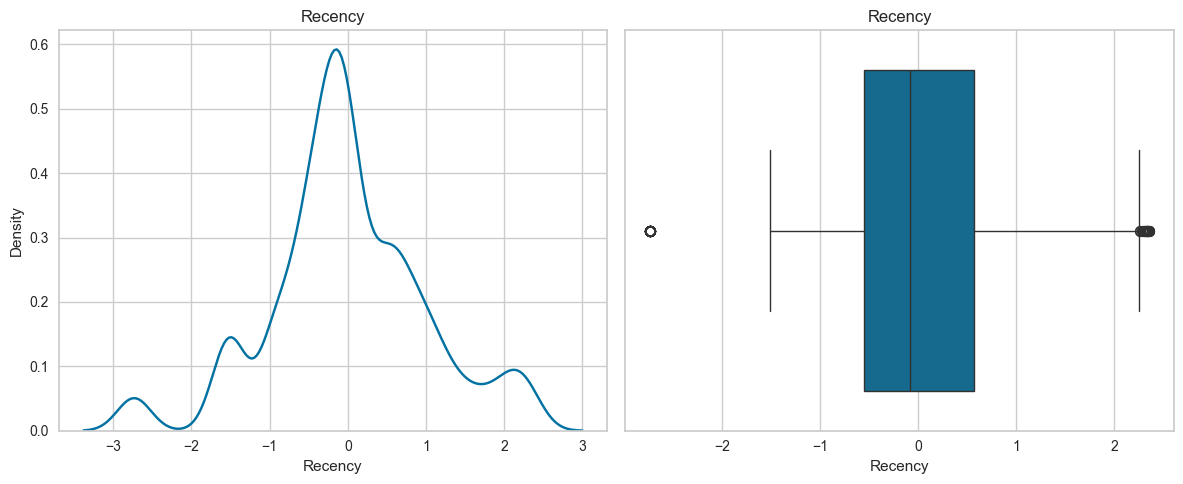

Describe:
count    2.158000e+03
mean     3.358450e-16
std      1.000232e+00
min     -2.731622e+00
25%     -5.525641e-01
50%     -8.839216e-02
75%      5.694334e-01
max      2.353861e+00
Name: Recency, dtype: float64
Name: Recency , dtype: float64
Mode: -0.08839216256187601
Nunique: 170
Range: 5.085482910571352
IQR: 1.1219975376456421
Var: 1.0004636068613815
Skew: -0.03232057772943266
Kurtosis: 0.647222350435412
Number of upper outliers: 35
Number of lower outliers: 59
Percentage of outliers: 4.4 %


************************************************************ 

Feature: Frequency


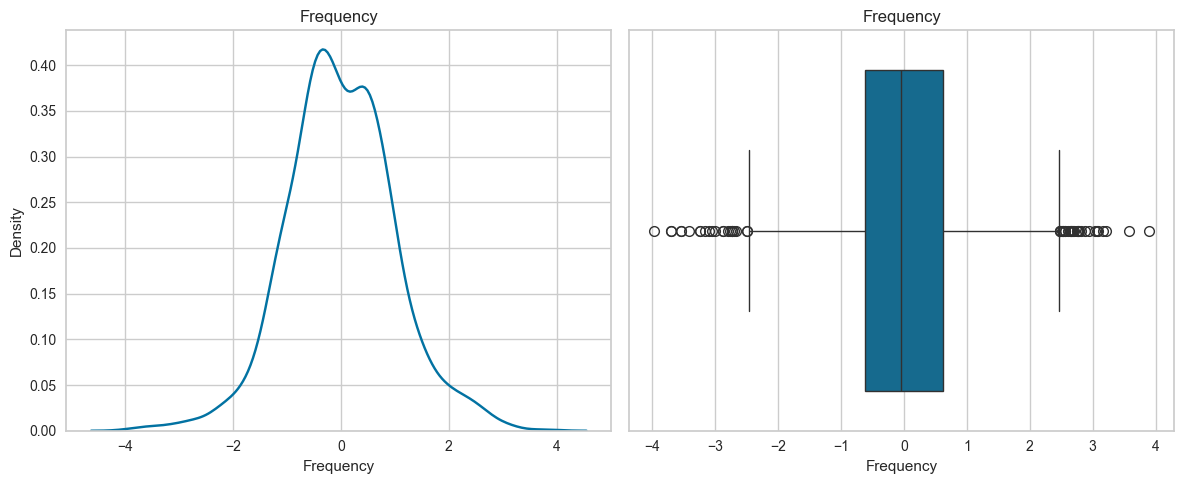

Describe:
count    2.158000e+03
mean     3.424302e-16
std      1.000232e+00
min     -3.976396e+00
25%     -6.161644e-01
50%     -5.061920e-02
75%      6.236712e-01
max      3.899526e+00
Name: Frequency, dtype: float64
Name: Frequency , dtype: float64
Mode: -1.1461049238017074
Nunique: 1566
Range: 7.875922184126031
IQR: 1.2398356105018569
Var: 1.0004636068613812
Skew: 0.04322677097961502
Kurtosis: 0.820854851256251
Number of upper outliers: 29
Number of lower outliers: 23
Percentage of outliers: 2.4 %


************************************************************ 

Feature: Monetary


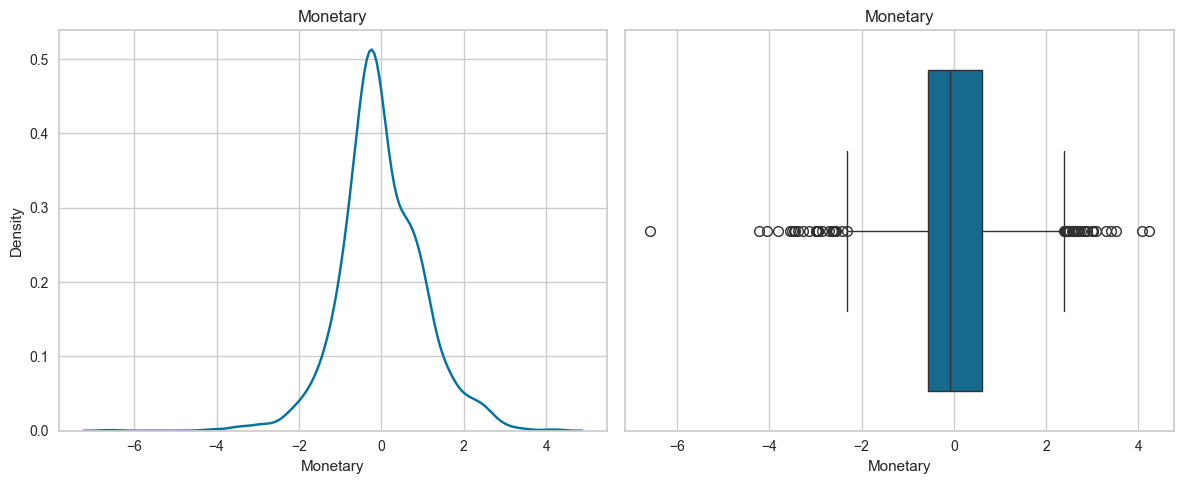

Describe:
count    2.158000e+03
mean     3.424302e-16
std      1.000232e+00
min     -6.579667e+00
25%     -5.612614e-01
50%     -9.209470e-02
75%      6.152970e-01
max      4.229172e+00
Name: Monetary, dtype: float64
Name: Monetary , dtype: float64
Mode: -2.982363845172511
Nunique: 2157
Range: 10.808839040149216
IQR: 1.1765584286632522
Var: 1.0004636068613815
Skew: 0.008782527495633343
Kurtosis: 1.9602318664182712
Number of upper outliers: 38
Number of lower outliers: 26
Percentage of outliers: 3.0 %


************************************************************ 



In [535]:
# Summary RFM data when using Standard Scaler

for col in rfm.columns[1:]:
    print('Feature:', col)
    univariate_visualization_analysis_continuous_variable(rfm_scaler, col)
    univariate_analysis_continuous_variable(rfm_scaler, col)
    n_O_upper, n_L_upper, outliers_per = check_outlier(rfm_scaler, col)
    print(f'Number of upper outliers: {n_O_upper}')
    print(f'Number of lower outliers: {n_L_upper}')
    print(f'Percentage of outliers: {outliers_per:.1f} %')
    print('\n')
    print('*' * 60 ,'\n')

In [536]:
'''
After applying the Standard Scaler, the distributions of the three variables appear to be close to normal distributions.
Additionally, the proportion of outliers in the variables has significantly decreased.
=> It is possible to proceed with using an algorithm to segment customers.
'''

'\nAfter applying the Standard Scaler, the distributions of the three variables appear to be close to normal distributions.\nAdditionally, the proportion of outliers in the variables has significantly decreased.\n=> It is possible to proceed with using an algorithm to segment customers.\n'

# V. Customer segmentation 

# 1. Using K-Means with Elbow Method

In [537]:
# Loop from 2 to 10 clusters and monitor the WSSE (within cluster sum of squares)
wsse_list = []
K_range = range(2, 11)

for k in K_range:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, random_state=42)

    # Fit the model to the data
    model.fit(rfm_scaler)

    # Append the inertia to the list of inertias
    wsse_list.append(model.inertia_)

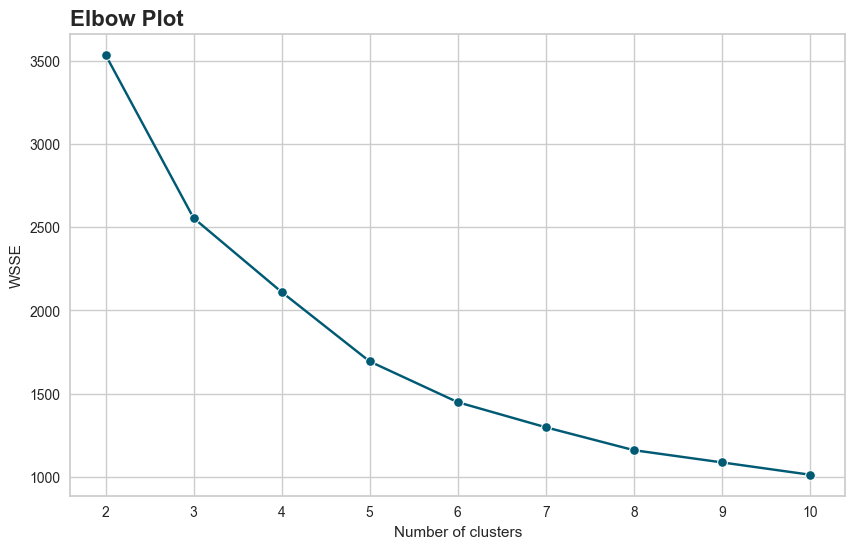

In [538]:
# Visualize the elbow plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=K_range, y=wsse_list, marker='o', color= "#005A74")
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.title('Elbow Plot',loc = 'left',  fontweight = 'heavy', fontsize = 16)
plt.show()

In [539]:
# The elbow method might not be very helpful in this situation, but looking at the overall picture, we can make a preliminary choice with 3 to 5 clusters for the problem.

# 2. Using Hierarchical Clustering with Dendrogram

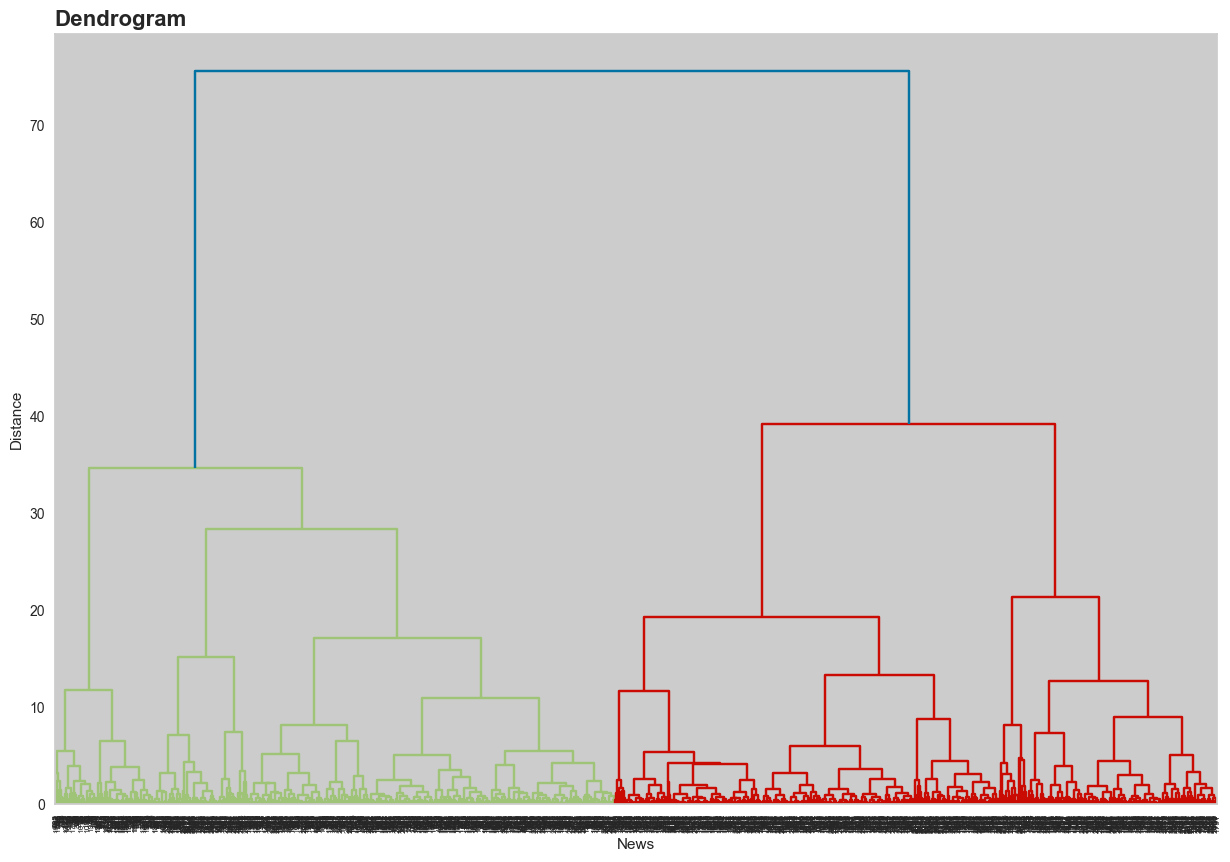

In [540]:
# Calculate the linkage
linkage_matrix = linkage(rfm_scaler, method = 'ward', metric= 'euclidean')

# Plot the dendrogram
plt.figure(figsize = (15, 10))
dendrogram(linkage_matrix, leaf_rotation= 90, leaf_font_size= 6)
plt.title('Dendrogram', loc = 'left', fontweight = 'heavy', fontsize = 16)
plt.xlabel('News')
plt.ylabel('Distance')
plt.show()

In [541]:
'''
The dendrogram provides a clearer view of how the data is clustered and somewhat reinforces the choice between 3 or 4 clusters from the previous method.
'''

'\nThe dendrogram provides a clearer view of how the data is clustered and somewhat reinforces the choice between 3 or 4 clusters from the previous method.\n'

# 3. Using K-Means with Silhouette Method

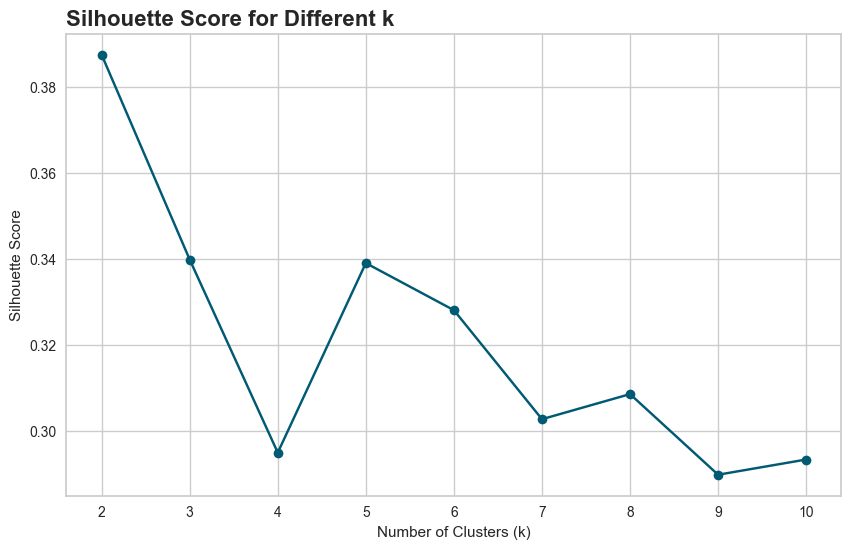

Best k value based on Silhouette Score: 2


In [542]:
silhouette_scores = []
possible_k_values = range(2, 11)  # k from 2 to 10
for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaler)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(rfm_scaler, labels))

# Visualize Silhouette Score for each k value
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, silhouette_scores, marker='o', color= "#005A74")
plt.title('Silhouette Score for Different k',loc = 'left',  fontweight = 'heavy', fontsize = 16)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(possible_k_values)
plt.grid(True)
plt.show()

# Choose the best k
best_k = possible_k_values[np.argmax(silhouette_scores)]
print(f"Best k value based on Silhouette Score: {best_k}")

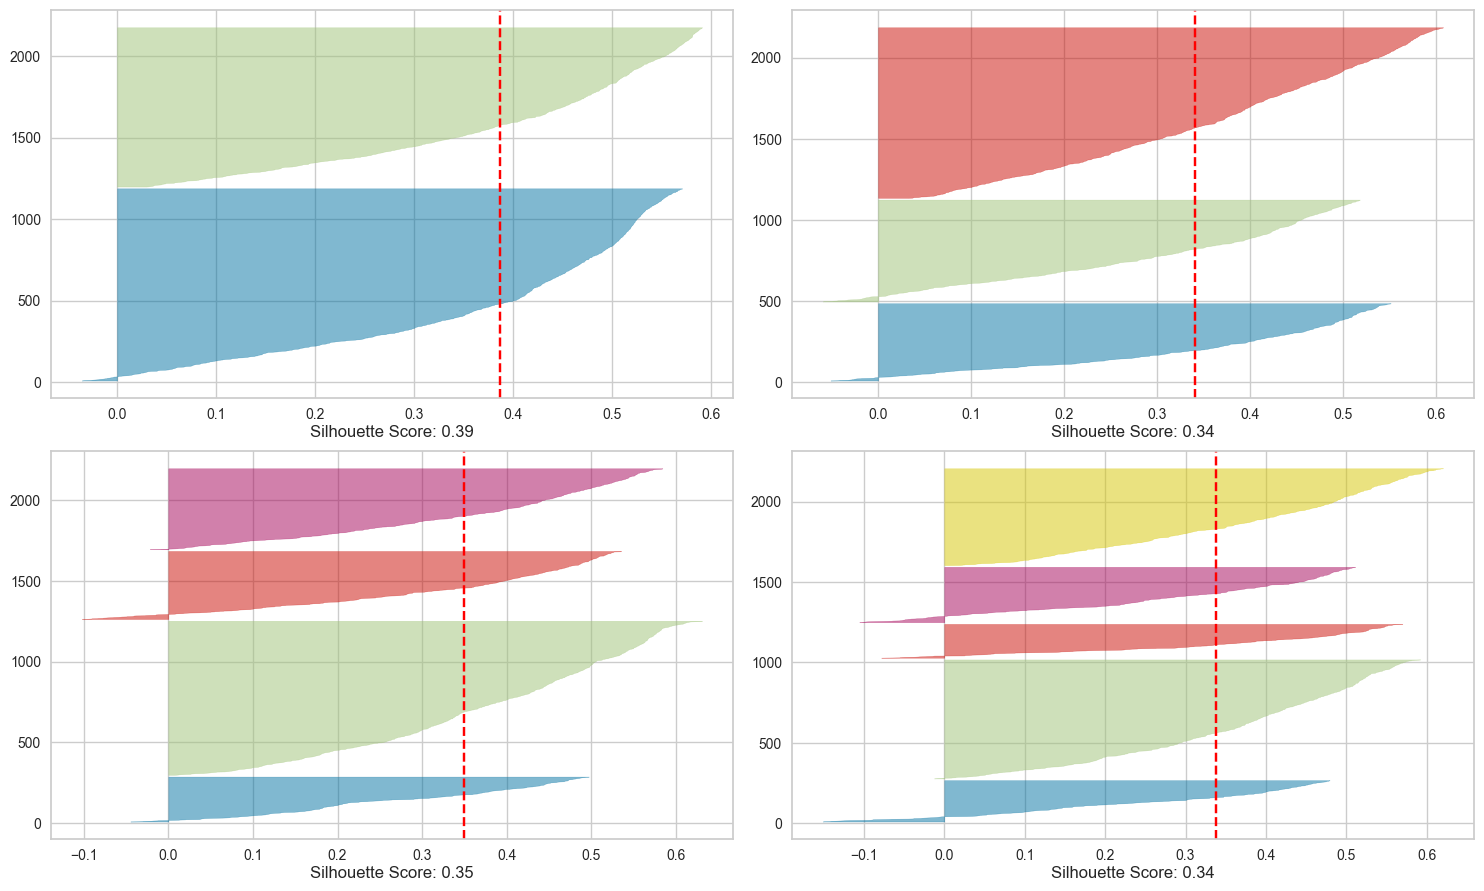

In [543]:
from yellowbrick.cluster import SilhouetteVisualizer
# Visualize
fig, ax = plt.subplots(2, 2, figsize=(15, 9))
for idx, k in enumerate([2, 3, 4, 5]):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(idx, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q][mod])
    visualizer.fit(rfm_scaler)
    ax[q][mod].text(0.5, -0.1, f'Silhouette Score: {np.mean(visualizer.silhouette_score_):.2f}', size=12, ha='center', transform=ax[q][mod].transAxes)
plt.tight_layout()
plt.show()

In [544]:
'''
In all three methods, we will not choose k = 2. Although the Silhouette Score indicates that k = 2 has the highest score, when looking at the Silhouette Chart at k = 2, the density of data within each cluster is relatively high. While the score and the consistency between clusters are reasonable, we need more than 2 customer groups in this problem to identify more detailed characteristics of each group, facilitating effective planning for the upcoming year.
For the Hierarchical Clustering method, we can more clearly determine the number of clusters, which are 3 and 4.
Finally, to make a decision based on the two points above after eliminating k = 2 and narrowing down the clusters to 3 and 4, we observe that the Silhouette Score at k = 3 is higher than the other clusters. However, after going through some detailed testing processes such as the number of customers in each cluster, the characteristics of the centroids of each cluster, k = 4 provides the optimal result among the mentioned clusters.
Therefore, by combining the three clustering methods as above, I choose k = 4.
'''

'\nIn all three methods, we will not choose k = 2. Although the Silhouette Score indicates that k = 2 has the highest score, when looking at the Silhouette Chart at k = 2, the density of data within each cluster is relatively high. While the score and the consistency between clusters are reasonable, we need more than 2 customer groups in this problem to identify more detailed characteristics of each group, facilitating effective planning for the upcoming year.\nFor the Hierarchical Clustering method, we can more clearly determine the number of clusters, which are 3 and 4.\nFinally, to make a decision based on the two points above after eliminating k = 2 and narrowing down the clusters to 3 and 4, we observe that the Silhouette Score at k = 3 is higher than the other clusters. However, after going through some detailed testing processes such as the number of customers in each cluster, the characteristics of the centroids of each cluster, k = 4 provides the optimal result among the menti

# 4. Choose k = 4 and fit it with scaler data (using K-Means)

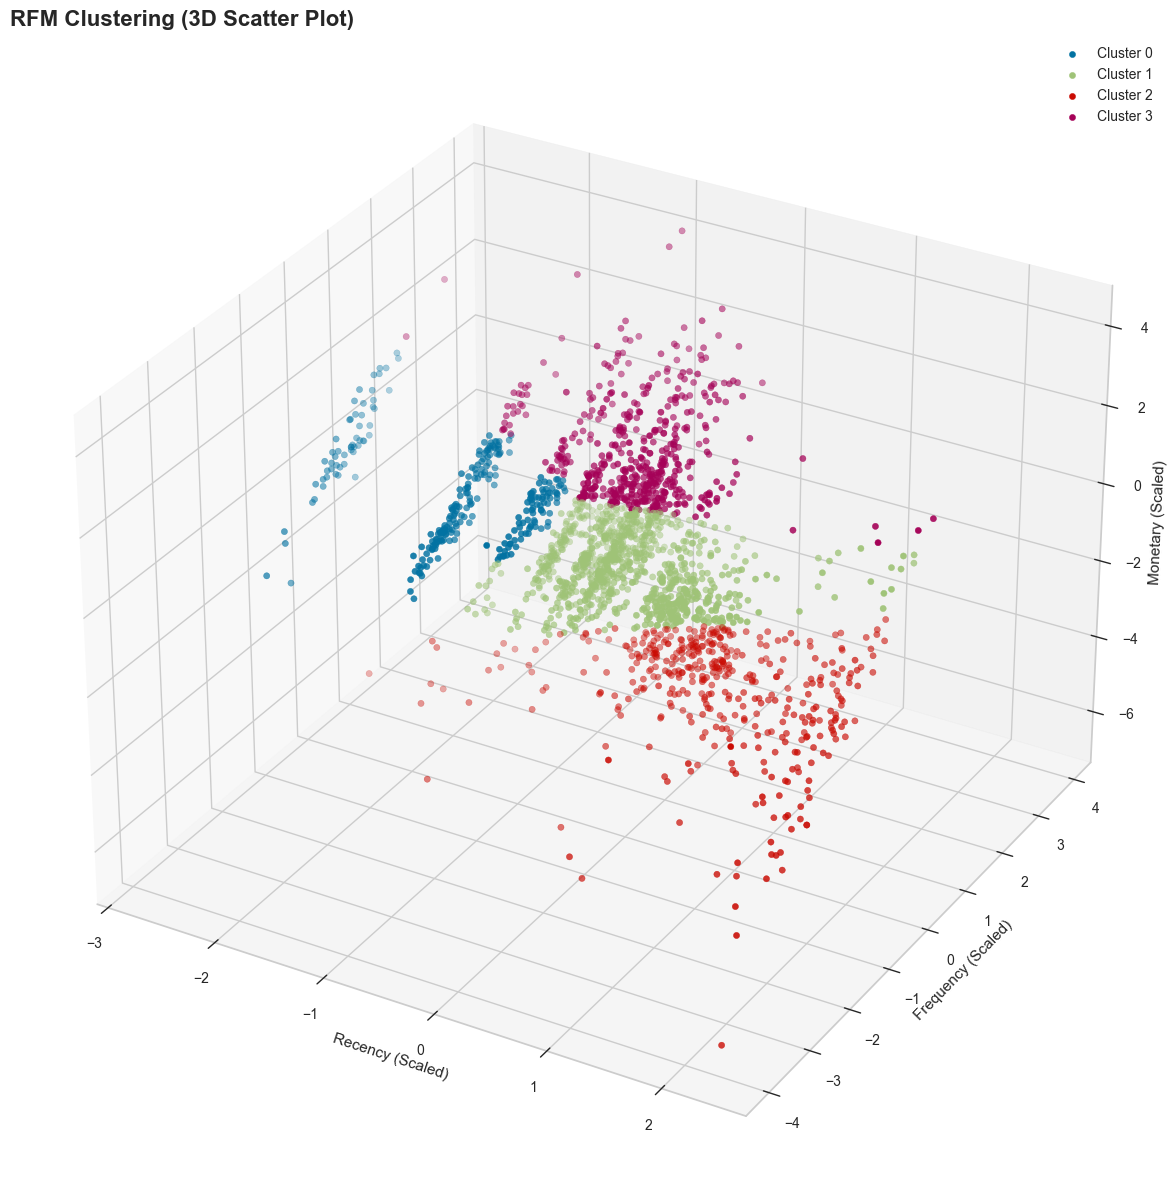

In [545]:
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=1000, random_state=42)
kmeans = kmeans.fit(rfm_scaler)
clusters = kmeans.predict(rfm_scaler)
rfm_scaler['Cluster'] = clusters

# Visualize with 3D graph by Recency, Frequency and Monetary
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

for i in range(k):
    cluster_data = rfm_scaler[rfm_scaler['Cluster'] == i]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'], label=f'Cluster {i}')

ax.set_xlabel('Recency (Scaled)')
ax.set_ylabel('Frequency (Scaled)')
ax.set_zlabel('Monetary (Scaled)')
ax.set_title('RFM Clustering (3D Scatter Plot)',loc = 'left',  fontweight = 'heavy', fontsize = 16)
ax.legend()
plt.show()

In [546]:
'''
The four clusters are relatively well-separated.
The data mixing ratio between clusters is quite low.
'''

'\nThe four clusters are relatively well-separated.\nThe data mixing ratio between clusters is quite low.\n'

In [547]:
rfm_scaler

,Recency,Frequency,Monetary,Cluster
0,-0.552564,1.453189,1.844912,3
1,-0.552564,1.461343,2.347522,3
2,-2.731622,2.788803,2.577394,3
3,-0.289118,2.229103,2.289516,3
4,-0.088392,1.470473,1.053040,3
...,...,...,...,...
2153,-1.512728,-2.140965,-2.317135,2
2154,0.887446,-3.422248,-4.214343,2
2155,-0.289118,-1.550245,-1.629012,2
2156,-0.923478,-2.432456,-2.308061,2


In [548]:
# Check Cluster Centers
kmeans.cluster_centers_

array([[-1.58408505,  0.1735609 ,  0.10425182],
       [ 0.08650262, -0.12840791, -0.15882895],
       [ 1.2666071 , -1.27908344, -1.22665362],
       [-0.34732177,  1.22786825,  1.2805956 ]])

In [549]:
# Create Cluster featue for rfm data
rfm['Cluster'] = clusters
rfm.sample(20)

,Store Number,Recency,Frequency,Monetary,Cluster
2133,10386,6,578,130317.24,1
379,4105,4,1399,289593.56,1
768,4785,10,1027,122556.00,1
645,4607,2,226,27844.72,0
1719,6186,504,108,16663.53,2
145,2687,14,409,56319.18,1
531,4414,2,1647,98270.73,0
217,3514,3,4796,527887.57,3
41,2549,5,8703,1950380.90,3
954,5147,21,649,47950.15,2


In [550]:
# Calculate mean score clusters for each feature
rfm_clusters = rfm.groupby('Cluster').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':'mean'
    }
).round(0)

rfm_clusters

,Recency,Frequency,Monetary
Cluster,,,
0,2.0,1513.0,177209.0
1,11.0,1000.0,110327.0
2,100.0,257.0,33095.0
3,7.0,4780.0,976250.0


In [551]:
rfm_clusters.reset_index(inplace = True)
rfm_clusters

,Cluster,Recency,Frequency,Monetary
0,0,2.0,1513.0,177209.0
1,1,11.0,1000.0,110327.0
2,2,100.0,257.0,33095.0
3,3,7.0,4780.0,976250.0


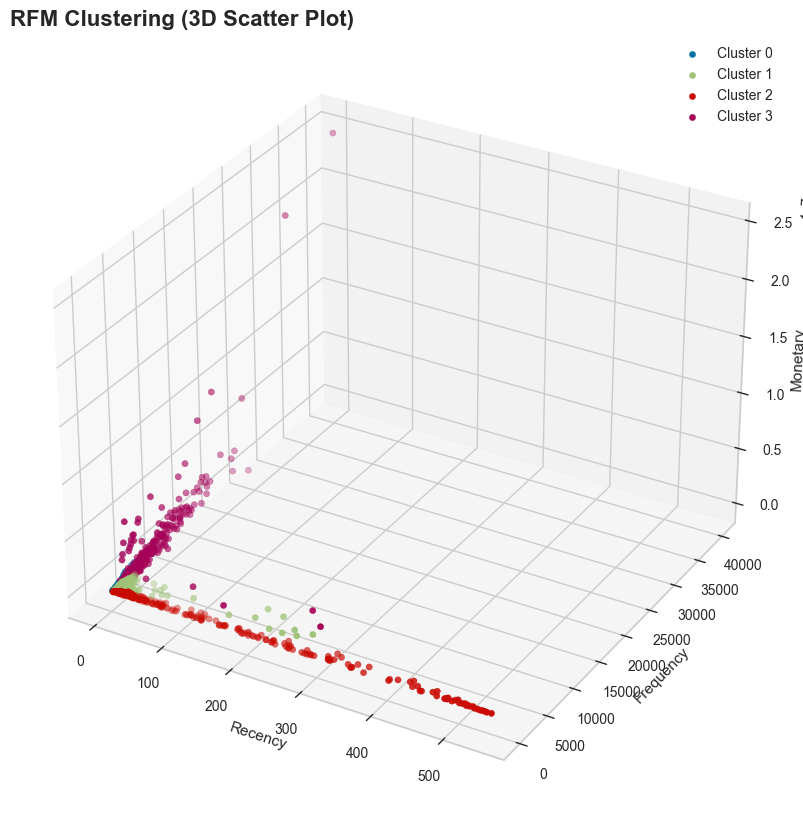

In [552]:
# Visualize with 3D graph by Recency, Frequency and Monetary for main data (rfm dataframe)

fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(111, projection='3d')
k = 4

for i in range(k):
    cluster_data = rfm[rfm['Cluster'] == i]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'], label=f'Cluster {i}')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('RFM Clustering (3D Scatter Plot)',loc = 'left',  fontweight = 'heavy', fontsize = 16)
ax.legend()
plt.show()

# 5. Summary about RFM after clustering customer

In [553]:
# How many customers for each clusters?

# Create number for each cluster dataframe
cluster_df = rfm['Cluster'].value_counts().to_frame().reset_index()
cluster_df.columns = ['Cluster', 'Number']
cluster_df

,Cluster,Number
0,1,955
1,3,502
2,2,422
3,0,279


In [554]:
rfm

,Store Number,Recency,Frequency,Monetary,Cluster
0,2106,4,4868,1265007.25,3
1,2130,4,4907,2385691.63,3
2,2190,1,16398,3184450.15,3
3,2191,5,10071,2217721.30,3
4,2200,6,4951,461698.06,3
...,...,...,...,...,...
2153,10418,2,50,5615.68,2
2154,10419,18,4,428.85,2
2155,10420,5,129,14042.67,2
2156,10422,3,30,5684.28,2


In [555]:
fig = px.scatter(rfm_clusters, x = "Recency", y = "Monetary", size = "Frequency", color = "Cluster", hover_name = "Cluster", size_max = 100)  
fig.update_layout(height=500, width=1500)
fig.update_layout(
    title="Details for each Clusters with Mean RFM values",
    height=500,
    width=1500
)
fig.show()

In [556]:
'''
Analysis of Customer Cluster Homogeneity and Differentiation:

1. Customer Count:
Homogeneity:
- The number of customers in each cluster is relatively even, with no significant differences. This indicates that the clustering process is effective and the clusters are of similar size.
Benefits:
- Facilitates easier comparison and analysis of clusters.
- Ensures the representativeness of each cluster in the analysis.

2. Distinctive Characteristics:
Differentiation:
- The clusters are distinct from each other with their own unique characteristics. This indicates that the clustering process is effective and the clusters have clear differences in characteristics.
Benefits:
- Helps to clearly identify different customer groups.
- Supports the development of appropriate marketing strategies for each customer group.

3. No Data Overlap:
Separation:
- There is no overlap of data between the clusters. This indicates that the clustering process is accurate and customers are clearly classified into each cluster.
Benefits:
- Ensures the accuracy of the analysis.
- Avoids misclassification of customers into inappropriate clusters.

-> Conclusion:
The analysis shows that the customer clustering process wiht K-Means model is effective and the clusters have homogeneity in terms of customer count, differentiation in terms of characteristics, and no data overlap. This makes it easier and more effective to compare, analyze and develop marketing strategies for each customer group.
'''

'\nAnalysis of Customer Cluster Homogeneity and Differentiation:\n\n1. Customer Count:\nHomogeneity:\n- The number of customers in each cluster is relatively even, with no significant differences. This indicates that the clustering process is effective and the clusters are of similar size.\nBenefits:\n- Facilitates easier comparison and analysis of clusters.\n- Ensures the representativeness of each cluster in the analysis.\n\n2. Distinctive Characteristics:\nDifferentiation:\n- The clusters are distinct from each other with their own unique characteristics. This indicates that the clustering process is effective and the clusters have clear differences in characteristics.\nBenefits:\n- Helps to clearly identify different customer groups.\n- Supports the development of appropriate marketing strategies for each customer group.\n\n3. No Data Overlap:\nSeparation:\n- There is no overlap of data between the clusters. This indicates that the clustering process is accurate and customers are c

In [557]:
# View Customers Group Data Distribution

# Create function to show histogram chart for each feature in RFM dataframe
def plot_cluster_histplots(dataframe):
    features = ['Recency', 'Frequency', 'Monetary']
    clusters = sorted(dataframe['Cluster'].unique())
    num_rows = len(features)
    num_cols = len(clusters)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

    for i, feature in enumerate(features):
        for j, cluster in enumerate(clusters):
            sns.histplot(dataframe[dataframe['Cluster'] == cluster][feature], ax=axes[i, j], kde=False, color= "#005A74")
            axes[i, j].set_title(f'Cluster {cluster}')
            axes[i, j].set_xlabel(feature)
            axes[i, j].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

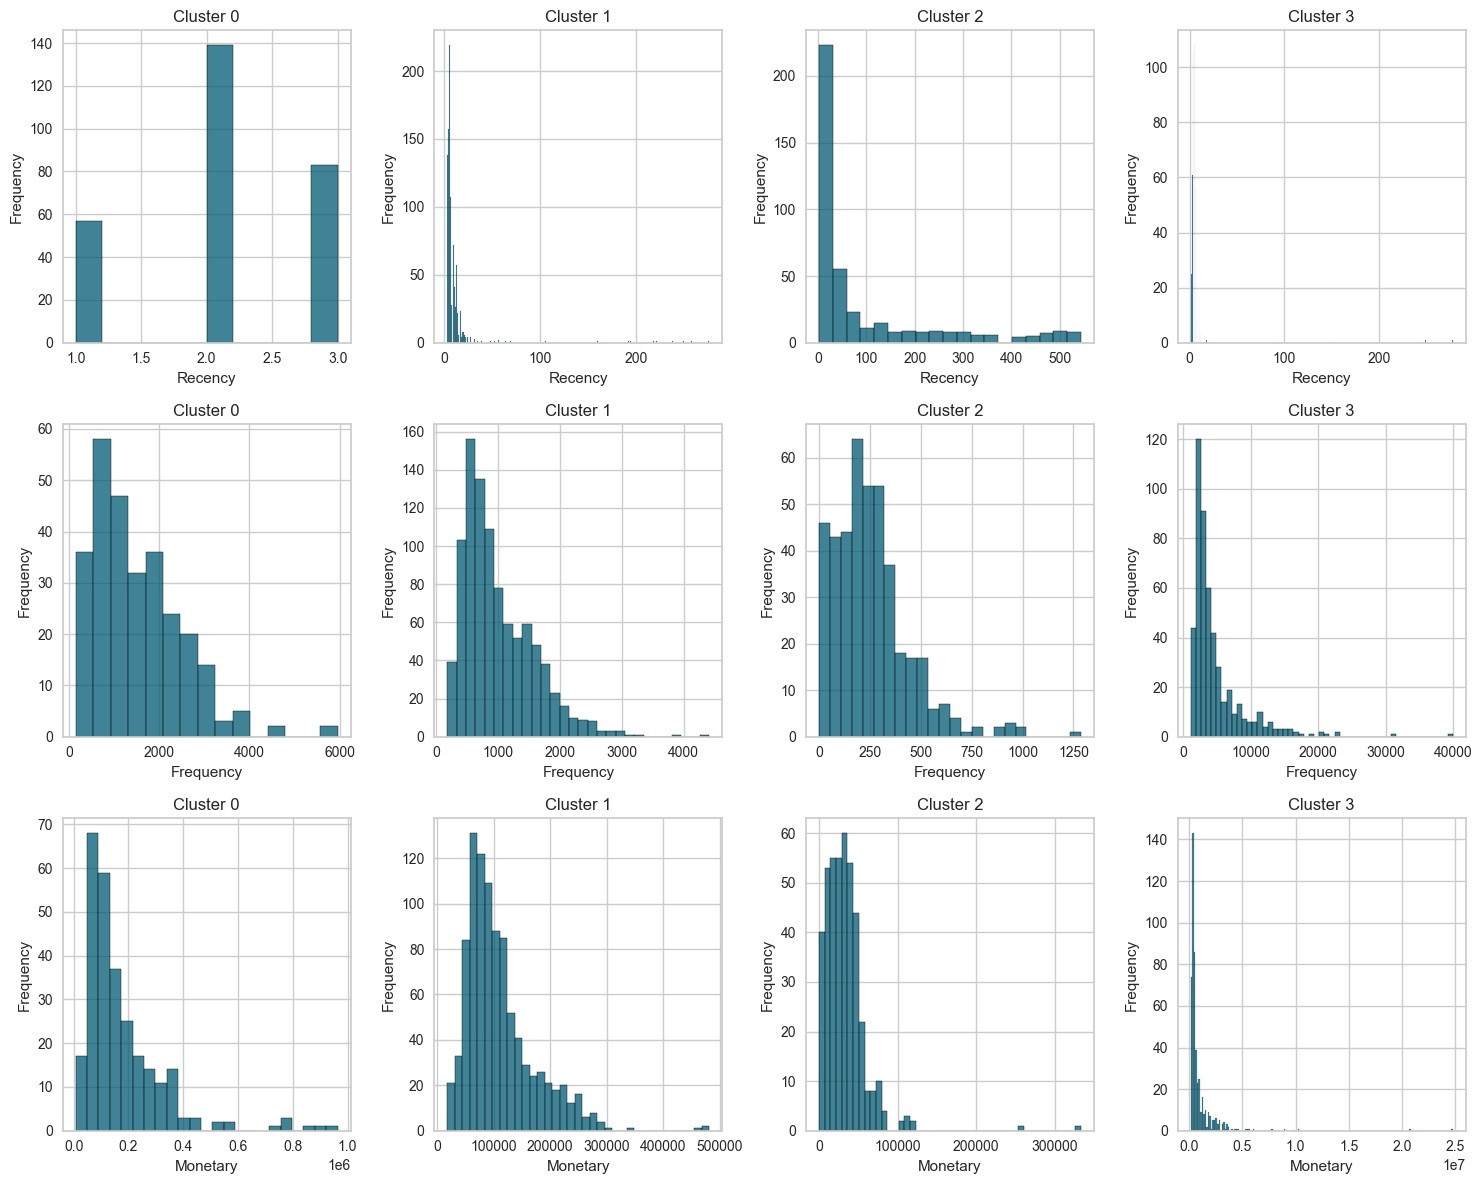

In [558]:
plot_cluster_histplots(rfm)

In [559]:
'''
By retaining the outliers from the beginning, it can be observed through some histogram plots that the data is concentrated in one range, with some points (with a relatively small proportion of data) extending far from the rest of the points (these are the outliers of each histogram that we are observing).
To make reading numbers and drawing conclusions through visual charts easier, we will use 90% of the data for observation.
'''

'\nBy retaining the outliers from the beginning, it can be observed through some histogram plots that the data is concentrated in one range, with some points (with a relatively small proportion of data) extending far from the rest of the points (these are the outliers of each histogram that we are observing).\nTo make reading numbers and drawing conclusions through visual charts easier, we will use 90% of the data for observation.\n'

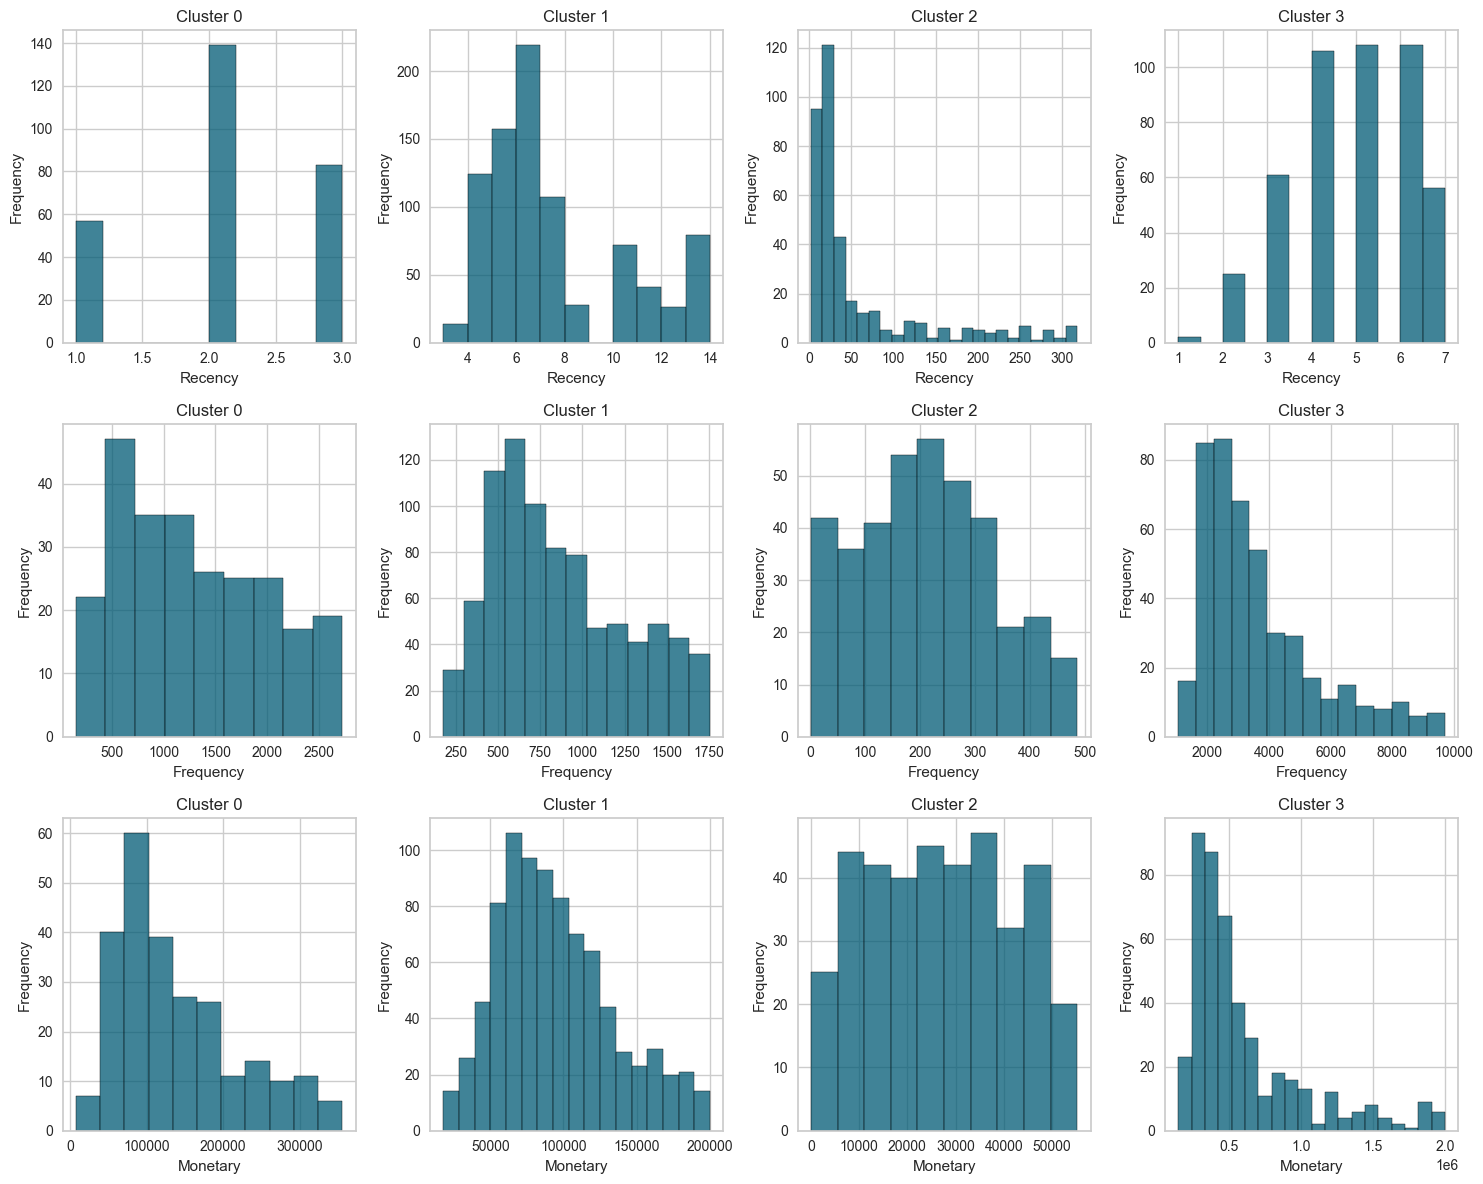

In [560]:
# Create function to show histogram chart for each feature in RFM dataframe when using 90% data
def plot_cluster_histplots(dataframe):
    features = ['Recency', 'Frequency', 'Monetary']
    clusters = sorted(dataframe['Cluster'].unique())
    num_rows = len(features)
    num_cols = len(clusters)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

    for i, feature in enumerate(features):
        for j, cluster in enumerate(clusters):
            # Calculate 90 percentiles for the feature in the current cluster
            quantile_90 = dataframe[dataframe['Cluster'] == cluster][feature].quantile(0.9)
            sns.histplot(dataframe[(dataframe['Cluster'] == cluster) & 
                        (dataframe[feature] <= quantile_90)][feature], 
                         ax=axes[i, j], kde=False, color= "#005A74")
            axes[i, j].set_title(f'Cluster {cluster}')
            axes[i, j].set_xlabel(feature)
            axes[i, j].set_ylabel('Frequency')


    plt.tight_layout()
    plt.show()

plot_cluster_histplots(rfm)

In [561]:
rfm_clusters

,Cluster,Recency,Frequency,Monetary
0,0,2.0,1513.0,177209.0
1,1,11.0,1000.0,110327.0
2,2,100.0,257.0,33095.0
3,3,7.0,4780.0,976250.0


# VI. Project conclusion

In [562]:
'''
By using 90% of the data for observation, we now observe that the histogram plots better depict the distribution of the data. Combined with the Cluster Centers, we will label each customer segment and propose solutions for the following issues:

Cluster 0:
- Summary
+ Recency: The average time since the last purchase is 2 days. The time ranges from 1 to 3 days at a particular store. (Frequent)
+ Frequency: The average frequency of purchases is 1,513 orders per 1.5 years. The number of orders ranges from 500 to 2,500 (with a maximum of 1,000) orders at a particular store. (On average)
+ Monetary: The average expenditure is 177,209 (Dollars). (High)
- Potential Loyalist: As a potential loyal customer group, these are individuals who have made recent purchases, but their quantity and value of orders are only at average levels.
- Problem: How can we increase the value of their shopping cart with each purchase?
- Recomment:
+ Offer free gifts for transactions above the brand's average value.
+ Upsell high-value products.
+ Seek feedback and implement campaigns to enhance engagement.

Cluster 1:
- Summary:
+ Recency: The average time since the last purchase is 11 days. The time ranges from 4 to 14 days (with a maximum of 7 days) at a particular store. (Average)
+ Frequency: The average frequency of purchases is 1,000 orders per 1.5 years. The number of orders ranges from 250 to 1750 orders at a particular store. (Low)
+ Monetary: The average expenditure is 110,327 (Dollars). The expenditure ranges from 20,000 to 200,000 (Dollars). (Relatively high compared to the total number of orders)
- Big Spenders: This group of customers does not make purchases frequently, but they have a high value per order compared to the modest frequency of purchases.
- Problem: How can they be encouraged to make more frequent purchases?
- Recomment:
+ Offer limited-time special promotions.
+ Provide recommendations based on their previous purchases.
+ Encourage them to join a membership program to receive more benefits, such as reward points, special discounts, thereby increasing their purchase frequency and fostering brand loyalty.

Cluster 2:
- Summary:
+ Recency: The average time since the last purchase is 100 days. The time ranges from 50 to over 300 days at a particular store. (Quite long)
+ Frequency: The average frequency of purchases is 257 orders per 1.5 years. The number of orders ranges from 50 to 500 orders at a particular store. (Very Low)
+ Monetary: The average expenditure is 33,095 (Dollars). The expenditure ranges from 5,000 to 50,000 (Dollars). (Very Low)
- Need Attention: This group of customers purchases infrequently, with relatively low quantity and value of orders.
- Problem: What causes their dissatisfaction and infrequent purchases?
- Recomment:
+ Reconnect with these customers through various means such as emails, direct interactions via social media, or phone calls.
+ Implement retargeting campaigns, short-term promotional programs with forms of vouchers, discounts, exclusive offers, etc.
+ Offer free trial policies to encourage them to return and make purchases.
+ Additionally, analyze their shopping cart history to identify any product-related factors contributing to their dissatisfaction.

Cluster 3:
- Summary:
+ Recency: The average time since the last purchase is 7 days. The time ranges from 1 to 7 days at a particular store. (Regularly)
+ Frequency: The average frequency of purchases is 4780 orders per year. The number of orders ranges from 2,000 to 10,000 orders at a particular store. (Very high)
+ Monetary: The average expenditure is 976,250 (Dollars). The expenditure ranges from 500,000 to 2,000,000 (Dollars). (Very High)
- Champions: These are new customers who transact frequently and spend the most. They are highly loyal, generous spenders, and likely to make another purchase soon.
- Problem: How can we retain these customers by any means necessary?
- Recomment:
+ Offer them privileges such as special discounts or early access to new products.
+ Attract them with exclusive promotional discount programs.
+ Encourage them to participate in loyalty programs to receive more benefits from their shopping.
'''

"\nBy using 90% of the data for observation, we now observe that the histogram plots better depict the distribution of the data. Combined with the Cluster Centers, we will label each customer segment and propose solutions for the following issues:\n\nCluster 0:\n- Summary\n+ Recency: The average time since the last purchase is 2 days. The time ranges from 1 to 3 days at a particular store. (Frequent)\n+ Frequency: The average frequency of purchases is 1,513 orders per 1.5 years. The number of orders ranges from 500 to 2,500 (with a maximum of 1,000) orders at a particular store. (On average)\n+ Monetary: The average expenditure is 177,209 (Dollars). (High)\n- Potential Loyalist: As a potential loyal customer group, these are individuals who have made recent purchases, but their quantity and value of orders are only at average levels.\n- Problem: How can we increase the value of their shopping cart with each purchase?\n- Recomment:\n+ Offer free gifts for transactions above the brand's 

# VII. Transform Cluster to Segment data and Export file

# 1. Transform & Merge data

In [563]:
rfm_clusters.reset_index(inplace = True, drop = True)
rfm_clusters

,Cluster,Recency,Frequency,Monetary
0,0,2.0,1513.0,177209.0
1,1,11.0,1000.0,110327.0
2,2,100.0,257.0,33095.0
3,3,7.0,4780.0,976250.0


In [564]:
rfm

,Store Number,Recency,Frequency,Monetary,Cluster
0,2106,4,4868,1265007.25,3
1,2130,4,4907,2385691.63,3
2,2190,1,16398,3184450.15,3
3,2191,5,10071,2217721.30,3
4,2200,6,4951,461698.06,3
...,...,...,...,...,...
2153,10418,2,50,5615.68,2
2154,10419,18,4,428.85,2
2155,10420,5,129,14042.67,2
2156,10422,3,30,5684.28,2


In [565]:
# Transform from Cluster to Segment name
rfm['Cluster'] = rfm['Cluster'].replace(3, 'Champions')
rfm_clusters['Cluster'] = rfm_clusters['Cluster'].replace(3, 'Champions')

rfm['Cluster'] = rfm['Cluster'].replace(1, 'Big Spenders')
rfm_clusters['Cluster'] = rfm_clusters['Cluster'].replace(1, 'Big Spenders')

rfm['Cluster'] = rfm['Cluster'].replace(2, 'Need Attention')
rfm_clusters['Cluster'] = rfm_clusters['Cluster'].replace(2, 'Need Attention')

rfm['Cluster'] = rfm['Cluster'].replace(0, 'Potential Loyalist')
rfm_clusters['Cluster'] = rfm_clusters['Cluster'].replace(0, 'Potential Loyalist')

# Rename Cluster column to Segment column
rfm = rfm.rename(columns = {'Cluster' : 'Customer Segment'})
rfm_clusters = rfm_clusters.rename(columns = {'Cluster' : 'Customer Segment'})

# Check rfm dataframe when transform
rfm

,Store Number,Recency,Frequency,Monetary,Customer Segment
0,2106,4,4868,1265007.25,Champions
1,2130,4,4907,2385691.63,Champions
2,2190,1,16398,3184450.15,Champions
3,2191,5,10071,2217721.30,Champions
4,2200,6,4951,461698.06,Champions
...,...,...,...,...,...
2153,10418,2,50,5615.68,Need Attention
2154,10419,18,4,428.85,Need Attention
2155,10420,5,129,14042.67,Need Attention
2156,10422,3,30,5684.28,Need Attention


In [566]:
rfm['Customer Segment'].value_counts()

Customer Segment
Big Spenders          955
Champions             502
Need Attention        422
Potential Loyalist    279
Name: count, dtype: int64

In [567]:
rfm_clusters

,Customer Segment,Recency,Frequency,Monetary
0,Potential Loyalist,2.0,1513.0,177209.0
1,Big Spenders,11.0,1000.0,110327.0
2,Need Attention,100.0,257.0,33095.0
3,Champions,7.0,4780.0,976250.0


In [568]:
# Merge Segment column from rfm dataframe in data df
df = df.merge(rfm[['Store Number', 'Customer Segment']], on = 'Store Number')

# Test sample data in dataframe 
df.sample(5)

,Invoice Number,Order Date,Store Number,Store Name,Address,City,Zip Code,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Product Name,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),US Counties,Store Longitude,Store Latitude,Customer Segment
2443171,INV-65098400004,2023-12-10,10298,CASEY'S #4308 / CHARITON,2130 COURT AVENUE WEST,CHARITON,50049,LUCAS,1012100,CANADIAN WHISKIES,260,DIAGEO AMERICAS,10803,CROWN ROYAL REGAL APPLE MINI 50 (ml),10,50,9.95,14.93,10,149.30,0.50,0.13,288,-93.326549,41.014097,Potential Loyalist
1408780,INV-60459200009,2023-07-19,5187,KWIK STOP LIQUOR & GROCERIES AMES,125 6TH ST,AMES,50010,STORY,1031100,AMERICAN VODKAS,301,FIFTH GENERATION INC,38179,TITOS HANDMADE VODKA 200 (ml),24,200,3.49,5.24,24,125.76,4.80,1.26,299,-93.61177,42.02692,Champions
966558,INV-58686100065,2023-05-22,2573,HY-VEE FOOD STORE / MUSCATINE,2400 2ND AVE,MUSCATINE,52761,MUSCATINE,1011400,TENNESSEE WHISKIES,85,BROWN FORMAN CORP.,26823,JACK DANIELS OLD #7 BLACK LABEL 200 (ml),48,200,4.23,6.35,12,76.20,2.40,0.63,1835,-91.03549,41.45015,Champions
2492058,INV-65307800005,2023-12-15,2606,HY-VEE WINE AND SPIRITS / HUMBOLDT,1011 13TH ST NORTH,HUMBOLDT,50548,HUMBOLDT,1012100,CANADIAN WHISKIES,259,HEAVEN HILL BRANDS,11771,BLACK VELVET MINI 50 (ml),8,50,8.87,13.31,1,13.31,0.05,0.01,283,-94.22713,42.73326,Champions
1762904,INV-61984200003,2023-09-07,9042,"AMERICAN HERITAGE DISTILLERS, LLC (ET)",PO BOX 1317,SPENCER,51301,CLAY,1031100,AMERICAN VODKAS,594,"AMERICAN HERITAGE DISTILLERS, LLC / CENTURY FA...",37131,CENTURY FARMS OPEN GATE VODKA 750 (ml),12,750,10.00,15.00,12,180.00,9.00,2.37,273,-95.145275,43.14832,Need Attention


In [569]:
# Check nunique data Segment using group by Store Number
number_customers = df.groupby('Customer Segment')['Store Number'].nunique().reset_index()
number_customers

,Customer Segment,Store Number
0,Big Spenders,955
1,Champions,502
2,Need Attention,422
3,Potential Loyalist,279


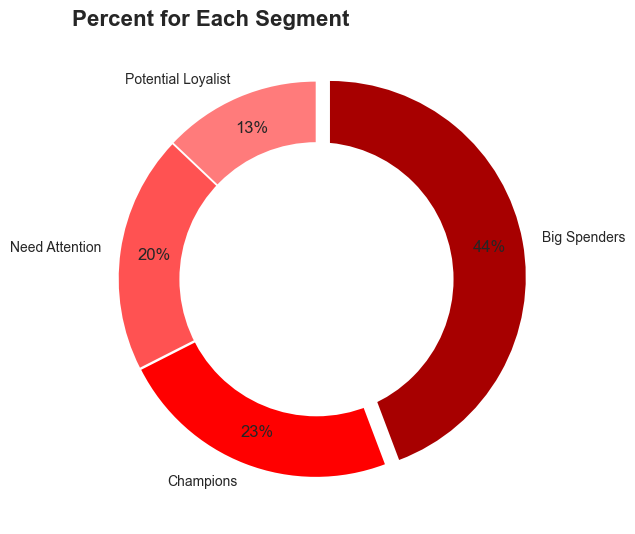

In [570]:
# Sort values by Number feature
number_customers.sort_values(by = 'Store Number', ascending= True, inplace= True)
# Reset index df
number_customers.reset_index(drop = True, inplace = True)

# Create pie chart to show percent for each cluster
labels = [(str(number_customers['Customer Segment'][x])) for x in range(len(number_customers))]
explode = [0.01, 0.01, 0.01, 0.07]
plt.pie(number_customers['Store Number'],
        labels = labels,
        autopct = '%1.0f%%',
        startangle = 90,
        explode= explode,
        pctdistance=0.83,
        colors = RFM_color
       )
# plt.axis('equal')
plt.title('Percent for Each Segment', loc = 'left',  fontweight = 'heavy', fontsize = 16)
plt.tight_layout()

circle = plt.Circle(xy= (0,0), radius= .70, facecolor = 'white')
plt.gca().add_artist(circle)
plt.show()

In [ ]:
'''
Visual analysis:
The donut chart visually represents the distribution of customers across different segments:
- Big Spenders (44%): The largest segment, emphasizing the importance of high-value customers.
- Champions (23%): A significant portion of loyal customers who need to be retained.
- Need Attention (20%): A sizeable segment that requires immediate focus to prevent churn.
- Potential Loyalist (13%): A smaller segment with growth potential.

Customer Ratio Analysis by Group:
1. Big Spenders Group:
Percentage: 44% of customers belong to the Big Spenders group.
Opportunity: This is the largest group, indicating a strong foundation of high-value customers who contribute significantly to revenue.
Strategy: Focus on personalized marketing and exclusive offers to maintain and increase their spending. Consider loyalty programs to encourage repeat purchases.
2. Champions Group:
Percentage: 23% of customers belong to the Champions group.
Status: This group is stable and crucial for long-term success.
Strategy: Maintain high levels of satisfaction through exceptional customer service and unique rewards. Ensure ongoing engagement to retain their loyalty.
3. Need Attention Group:
Percentage: 20% of customers belong to the Need Attention group.
Priority: This group needs to be addressed promptly to prevent churn.
Action: Conduct a detailed analysis to understand their issues and provide targeted solutions. Implement retention strategies to convert them into loyal customers.
4. Potential Loyalist Group:
Percentage: 13% of customers belong to the Potential Loyalist group.
Opportunity: This group has the potential to move up to the Big Spenders or Champions categories with the right engagement.
Strategy: Develop targeted campaigns to nurture loyalty and encourage higher spending. Provide incentives and personalized offers to enhance their experience.
'''

# 2. Export data

In [571]:
# Data final
df.to_csv('data_cleaned_final_Iowa_Liquor_Sales.csv', index = False)

In [572]:
rfm_clusters.to_csv('data_model_pbi_Iowa_Liquor_RFMcluster.csv', index = False)
rfm_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer Segment  4 non-null      object 
 1   Recency           4 non-null      float64
 2   Frequency         4 non-null      float64
 3   Monetary          4 non-null      float64
dtypes: float64(3), object(1)
memory usage: 260.0+ bytes


In [573]:
rfm_clusters

,Customer Segment,Recency,Frequency,Monetary
0,Potential Loyalist,2.0,1513.0,177209.0
1,Big Spenders,11.0,1000.0,110327.0
2,Need Attention,100.0,257.0,33095.0
3,Champions,7.0,4780.0,976250.0
